# cla.metrics (CLassifiability Analysis Metrics)

An integrated toolkit for classifiability analysis

pyCLAMs: An integrated Python toolkit for classifiability analysis [J]. SoftwareX, Volume 18, June 2022, 101007, doi: 10.1016/j.softx.2022.101007  
https://doi.org/10.1016/j.softx.2022.101007


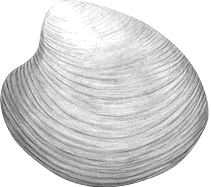


### Motivations

In many data-driven discriminative tasks, without specific priori knowledge, scientists often start with popular classifier models in machine learning. If works, bingo! A happy ending. the alorithm can be deployed into production and the researcch get published. Otherwise, continue to try other more sophisticated model. If all major models fail, we have to turn to other detection modalities, which usually mean the modality generating the current data set doesn't capture the information we need for the task.

A fundamental question beneath the above "trial and error" (Trial and error is a fundamental method of problem solving. It is characterised by repeated, varied attempts which are continued until success, or until the practicer stops trying) practice:
Does the dataset possess the statistical differences between different groups/classes? or Are the samples drawn from different distributions (generation processes)?

This reveals an implicit and often neglected pre-assessment step in the entire pipeline: the dataset classifiability analysis

# API demostration of pyCLAMs.py

import the library

In [1]:
from clams import *

Unable to determine R home: [WinError 2] The system cannot find the file specified


rpy2 3.X may not support Windows. ECoL metrics may not be available.


## A list of all supported metrics


    ['classification.ACC',
     'classification.Kappa',
     'classification.F1_Score',
     'classification.Jaccard',
     'classification.Precision',
     'classification.Recall',
     'classification.McNemar',
     'classification.McNemar.CHI2',
     'classification.CochranQ',
     'classification.CochranQ.T',
     'classification.CrossEntropy',
     'classification.Mean_KLD',
     'classification.AP',
     'classification.Brier',
     'classification.ROC_AUC',
     'classification.PR_AUC',
     'classification.BER',
     'correlation.IG',
     'correlation.IG.max',
     'correlation.r',
     'correlation.r2',
     'correlation.r.p',
     'correlation.r.max',
     'correlation.r.p.min',
     'correlation.rho',
     'correlation.rho.p',
     'correlation.rho.max',
     'correlation.rho.p.min',
     'correlation.tau',
     'correlation.tau.p',
     'correlation.tau.max',
     'correlation.tau.p.min',
     'test.ES',
     'test.ES.max',
     'test.ANOVA',
     'test.ANOVA.min',
     'test.ANOVA.min.log10',
     'test.ANOVA.F',
     'test.ANOVA.F.max',
     'test.MANOVA',
     'test.MANOVA.log10',
     'test.MANOVA.F',
     'test.MWW',
     'test.MWW.min',
     'test.MWW.min.log10',
     'test.MWW.U',
     'test.MWW.U.min',
     'test.KS',
     'test.KS.min',
     'test.KS.min.log10',
     'test.KS.D',
     'test.KS.D.max',
     'test.CHISQ',
     'test.CHISQ.min',
     'test.CHISQ.min.log10',
     'test.CHISQ.CHI2',
     'test.CHISQ.CHI2.max',
     'overlapping.F1.mean',
     'overlapping.F1.sd',
     'overlapping.F1v.mean',
     'overlapping.F1v.sd',
     'overlapping.F2.mean',
     'overlapping.F2.sd',
     'overlapping.F3.mean',
     'overlapping.F3.sd',
     'overlapping.F4.mean',
     'overlapping.F4.sd',
     'neighborhood.N1',
     'neighborhood.N2.mean',
     'neighborhood.N2.sd',
     'neighborhood.N3.mean',
     'neighborhood.N3.sd',
     'neighborhood.N4.mean',
     'neighborhood.N4.sd',
     'neighborhood.T1.mean',
     'neighborhood.T1.sd',
     'neighborhood.LSC',
     'linearity.L1.mean',
     'linearity.L1.sd']

In [2]:
# Total metric number
len(metrics_keys())

C:\Users\eleve\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `sigma_` was deprecated in 1.0 and will be removed in1.2. Use `var_` instead.
  warnings.warn(msg, category=FutureWarning)
R[write to console]: Loading required package: ECoL



79

# The following demostrate main API functions

## `mvg`

generates a 2D guassian dataset with a specified between-class distance

In [3]:
df = pd.read_csv('sample.csv')
X = np.array(df.iloc[:,:-1]) # skip first and last cols
y = np.array(df.iloc[:,-1])

<AxesSubplot:>

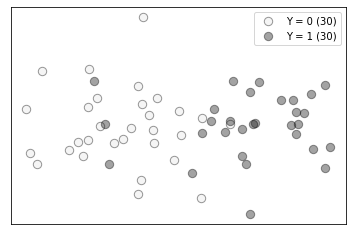

In [4]:
# or generate a toy dataset by X,y = mvg(md = 2)
X.shape, y.shape
plotComponents2D(X,y,labels = set(y))

## `BER`

Bayes Error Rate.

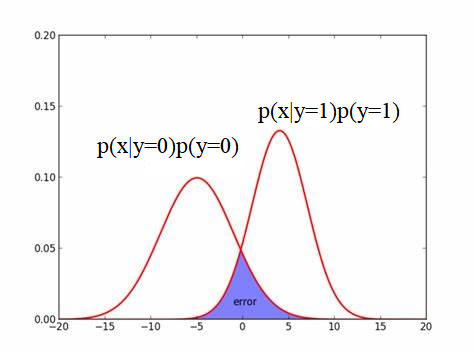

$$ BER= 1- E ({\max}_j P(Y=j|X) $$

It is the lowest possible test error rate in classification which is produced by the Bayes classifier. It is analogous to the irreducible error rate.  
Because of noise (inherently stochastic), the error incurred by the oracle prediction model from the true distribution p(x,y) is the Bayes error.  
The Bayes optimal decision boundary will correspond to the point where two densities are equal. 

C:\Users\eleve\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `sigma_` was deprecated in 1.0 and will be removed in1.2. Use `var_` instead.
  warnings.warn(msg, category=FutureWarning)


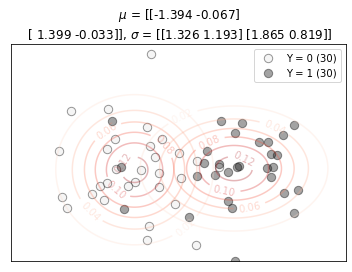

In [5]:
ber, _ = BER(X,y, show = True)

*The naive assumption in Bayes Classifier*

In most cases, we can accept the naïve assumption, i.e., all features are independent of each other. As a result, the covariance matrix Σ becomes diagonal and the distribution is further simplified.   

Why is this naive assumption reasonable for spectroscopic data?

According to the central limit theorem (CLT), if a statistic is a sum or average of repetitive measurements, it will be approximately normal under certain technical conditions regardless of the distribution of the individual samples. Each wave number in Raman or tof in ms, from physical process, is a an accumulation of measurement of photons/ions/particles. Features are uncorreleted. In micro level, physical process, photons/ions/particles of different frequency/energy/mass/electric charge don't interfere with each other. The coocurrence / correlation between features is a macro relation. i.e., Peak patterns.

Optional: check feature normality, e.g., by Q-Q plot
Implementation

To calculate BER, we can either use:

    We need to integrate over the density that is not the highest one for each point. As there are two densities, we need to sum up the two integrals. We can use numerical integration package, e.g. scipy.integrate

    use Gaussian NB classifier, e.g. sklearn.naive_bayes.GaussianNB
    predict_proba() returns the probability of the samples for each class in the model


## `CLF`

Classification Accuracy by a n-fold CV SVM

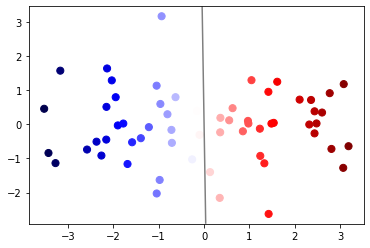

In [6]:
_ = CLF(X, y, verbose = True, show = True)

## `IG`

Information Gain. Output the IG between each feature Xi and y.  

Information gain has been used in decision tree. For a specific feature, Information gain (IG) measures how much “information” a feature gives us about the class.

$IG(Y|X) = H(Y) - H(Y|X) $  

In information theory, IG answers "if we transmit Y, how many bits can be saved if both sender and receiver know X?" Or "how much information of Y is implied in X?"

Attribute/feature X with a high IG is a good split on Y.

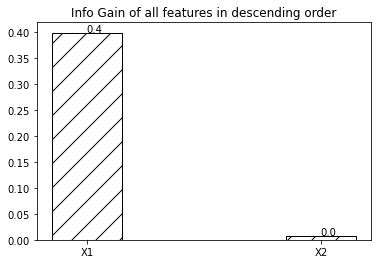

In [7]:
ig, _ = IG(X,y,show = True)

*IG for high-dimensional data*

$ I(X_1, X_2, ... X_n, Y) = H(X_1, X_2, ... X_n) + H(Y) – H(X_1, X_2, ... X_n,Y)  $

$ H(X_1, X_2, ... X_n) =  - \sum (p(x_1, x_2, ... x_n) log_2 (p(x_1, x_2, ... x_n)) ) $

We can use `numpy.histogramdd` to get hte joint probability: 

```
import numpy as np
numBins = 100  # number of bins in each dimension
jointProbs, edges = np.histogramdd(X, bins=numBins) # Easy to raise MemoryError. Only support 32 dims maximumly. 
jointProbs /= jointProbs.sum()
jointProbs
```
However, the current version doesn't support high-dimensional (>32) data.

## `ANOVA`

Perform ANOVA test on each feature Xi.

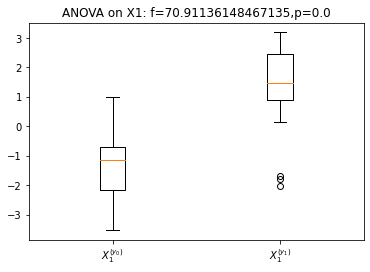

ANOVA on X1: f=70.91136148467135,p=0.0


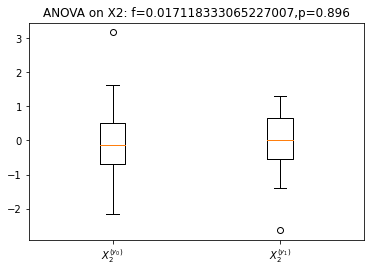

ANOVA on X2: f=0.017118333065227007,p=0.896


In [8]:
p, F, _ = ANOVA(X,y, verbose = True, show = True)

## `MANOVA`

Perform MANOVA test on the first N features.

In [9]:
p, F, _ = MANOVA(X,y, verbose = True)

endog: ['X1', 'X2']
exog: ['Intercept', 'y']

                 Multivariate linear model
                                                            
------------------------------------------------------------
       Intercept        Value  Num DF  Den DF F Value Pr > F
------------------------------------------------------------
          Wilks' lambda 0.6201 2.0000 57.0000 17.4576 0.0000
         Pillai's trace 0.3799 2.0000 57.0000 17.4576 0.0000
 Hotelling-Lawley trace 0.6125 2.0000 57.0000 17.4576 0.0000
    Roy's greatest root 0.6125 2.0000 57.0000 17.4576 0.0000
------------------------------------------------------------
                                                            
------------------------------------------------------------
           y            Value  Num DF  Den DF F Value Pr > F
------------------------------------------------------------
          Wilks' lambda 0.4497 2.0000 57.0000 34.8823 0.0000
         Pillai's trace 0.5503 2.0000 57.0000 34.8823 0.0

## `MWW`

Mann–Whitney U test (also called the Mann–Whitney–Wilcoxon (MWW), Wilcoxon rank-sum test, or Wilcoxon–Mann–Whitney test) is a nonparametric test.
This test can be used to determine whether two independent （独立、非配对） samples were selected from populations having the same distribution.

Other non-parametric tests are not suitable for classifiability analysis. For example, chi-square test is for nominal data. Signed rank sum test (符号秩和检验) is for paired (相关\配对样本) samples. 

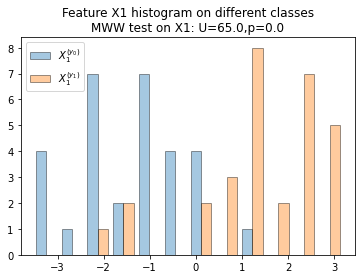

MWW test on X1: U=65.0,p=0.0


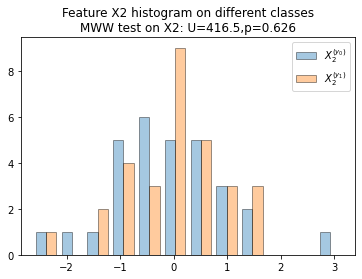

MWW test on X2: U=416.5,p=0.626


In [10]:
p, U, _ = MWW(X,y, verbose = True, show = True)

## `cohen_d`

Cohen's d effect size. Use the pooled standard deviation internally.

$$ Cohen_d = { {\mu_2 - \mu_1} \over \sigma }=  {{\mu_2 - \mu_1} \over {SD_{pooled}}}  $$

The Pooled Standard Deviation is

$$ SD_{pooled} = \sqrt { {(n_1-1) SD_1^2 + (n_2-1) SD_2^2 } \over {n_1 + n_2 - 2} }  $$

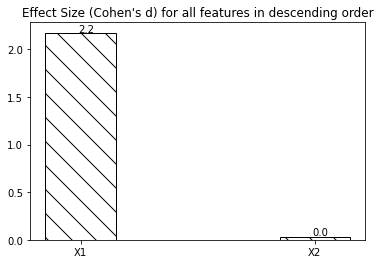

In [11]:
es, _ = cohen_d(X, y, show = True)

## `Pearson r`, `Spearman rho`, `Kendall tau`

Besides these three correlation coefficients, IG/MI can also be seen as a measure of correlation.

In [12]:
correlate(X,y, verbose = True)



#### Correlation between X1 and y ####

Pearson r: 0.742, p-value: 0.0
Spearman rho: 0.741, p-value: 0.0
Kendall's tau: 0.61, p-value: 0.0

#### Correlation between X2 and y ####

Pearson r: 0.017, p-value: 0.896
Spearman rho: 0.064, p-value: 0.625
Kendall's tau: 0.053, p-value: 0.62


({'correlation.r': [0.7416727355635289, 0.017177211340979777],
  'correlation.r2': array([5.50078447e-01, 2.95056589e-04]),
  'correlation.r.p': [1.2116341137234975e-11, 0.8963569761285588],
  'correlation.r.max': 0.7416727355635289,
  'correlation.r.p.min': 1.2116341137234975e-11,
  'correlation.rho': [0.7410357742436601, 0.0644806320198157],
  'correlation.rho.p': [1.2886434965392313e-11, 0.6245104252555516],
  'correlation.rho.max': 0.7410357742436601,
  'correlation.rho.p.min': 1.2886434965392313e-11,
  'correlation.tau': [0.6100744502949613, 0.053099402170811265],
  'correlation.tau.p': [1.2555706904068783e-08, 0.6203988641718396],
  'correlation.tau.max': 0.6100744502949613,
  'correlation.tau.p.min': 1.2555706904068783e-08},
 "\n\n#### Correlation between X1 and y ####\n\nPearson r: 0.742, p-value: 0.0\nSpearman rho: 0.741, p-value: 0.0\nKendall's tau: 0.61, p-value: 0.0\n\n#### Correlation between X2 and y ####\n\nPearson r: 0.017, p-value: 0.896\nSpearman rho: 0.064, p-value: 

## `KS`

Two-sample Kolmogorov–Smirnov test. 

The two-sample KS test is one of the most useful and general nonparametric methods for comparing two samples, as it is sensitive to differences in both location and shape of the empirical cumulative distribution functions of the two samples. The Kolmogorov–Smirnov test can serve as a goodness of fit test. KS test is suitable for continous numeric values while chi-square test is for nominal values. 

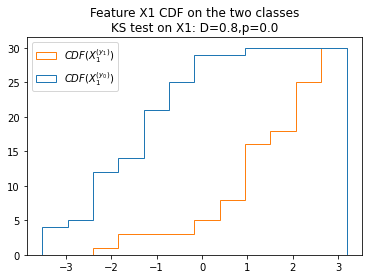

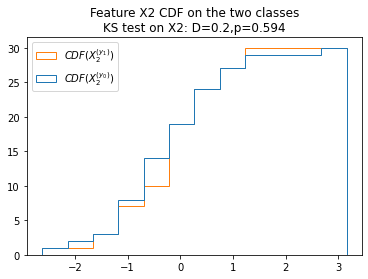

In [13]:
_ = KS(X,y, show = True)

## `ECoL`

In [14]:
setup_ECoL()
ECoL_metrics(X,y)

R[write to console]: Installing packages into 'C:/Users/eleve/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



({'overlapping.F1.mean': 0.4027582031317379,
  'overlapping.F1.sd': 0.47839672891310947,
  'overlapping.F1v.mean': 0.725,
  'overlapping.F1v.sd': 0.03535533905932741,
  'overlapping.F2.mean': 0.7166666666666667,
  'overlapping.F2.sd': 0.2616330237780185,
  'overlapping.F3.mean': 0.21143857773543168,
  'overlapping.F3.sd': 0.11241300675009834,
  'overlapping.F4.mean': nan,
  'overlapping.F4.sd': 0.08091196867571801,
  'neighborhood.N1': 0.11121386281545358,
  'neighborhood.N2.mean': 0.2542372881355932,
  'neighborhood.N2.sd': 0.4372884724873967,
  'neighborhood.N3.mean': 0.2175486755928619,
  'neighborhood.N3.sd': 0.0998539381017887,
  'neighborhood.N4.mean': 0.26666666666666666,
  'neighborhood.N4.sd': 0.4459484908564835,
  'neighborhood.T1.mean': 0.09006072605385092,
  'neighborhood.T1.sd': 0.28222603644366473,
  'neighborhood.LSC': 0.03333333333333333,
  'linearity.L1.mean': 0.03333333333333333,
  'linearity.L1.sd': 1.0},
 'overlapping.F1.mean\t0.4027582031317379\noverlapping.F1.sd\t

## `get_metrics()`

Return a dictionary of all metrics

In [15]:
get_metrics(X,y)

C:\Users\eleve\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `sigma_` was deprecated in 1.0 and will be removed in1.2. Use `var_` instead.
  warnings.warn(msg, category=FutureWarning)


({'classification.ACC': 0.9,
  'classification.Kappa': 0.8,
  'classification.F1_Score': 0.9,
  'classification.Jaccard': 0.8181818181818182,
  'classification.Precision': 0.9,
  'classification.Recall': 0.9,
  'classification.McNemar': 0.6830913983096086,
  'classification.McNemar.CHI2': 0.16666666666666666,
  'classification.CochranQ': 1.0,
  'classification.CochranQ.T': 0.0,
  'classification.CrossEntropy': 0.6902442451464471,
  'classification.Mean_KLD': 0.6902442451464471,
  'classification.AP': 0.9496893963781106,
  'classification.Brier': 0.24854854456045616,
  'classification.ROC_AUC': 0.9277777777777778,
  'classification.PR_AUC': 0.9490515409214031,
  'classification.BER': 0.020761033389453898,
  'correlation.IG': [0.39806530243419913, 0.0072766756747406625],
  'correlation.IG.max': 0.39806530243419913,
  'correlation.r': [0.7416727355635289, 0.017177211340979777],
  'correlation.r2': [0.5500784466782882, 0.0002950565894526843],
  'correlation.r.p': [1.2116341137234975e-11, 0

## `get_json`



In [16]:
get_json(X,y)

C:\Users\eleve\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `sigma_` was deprecated in 1.0 and will be removed in1.2. Use `var_` instead.
  warnings.warn(msg, category=FutureWarning)


'[{"classification.ACC": 0.9, "classification.Kappa": 0.8, "classification.F1_Score": 0.9, "classification.Jaccard": 0.8181818181818182, "classification.Precision": 0.9, "classification.Recall": 0.9, "classification.McNemar": 0.6830913983096086, "classification.McNemar.CHI2": 0.16666666666666666, "classification.CochranQ": 1.0, "classification.CochranQ.T": 0.0, "classification.CrossEntropy": 0.6902442451464471, "classification.Mean_KLD": 0.6902442451464471, "classification.AP": 0.9496893963781106, "classification.Brier": 0.24854854456045616, "classification.ROC_AUC": 0.9277777777777778, "classification.PR_AUC": 0.9490515409214031, "classification.BER": 0.02105518736273626, "correlation.IG": [0.39806530243419913, 0.010054453452518208], "correlation.IG.max": 0.39806530243419913, "correlation.r": [0.7416727355635289, 0.017177211340979777], "correlation.r2": [0.5500784466782882, 0.0002950565894526843], "correlation.r.p": [1.2116341137234975e-11, 0.8963569761285588], "correlation.r.max": 0.

## `get_html`

Return a piece of HTML to be embedded in web applications.

C:\Users\eleve\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `sigma_` was deprecated in 1.0 and will be removed in1.2. Use `var_` instead.
  warnings.warn(msg, category=FutureWarning)



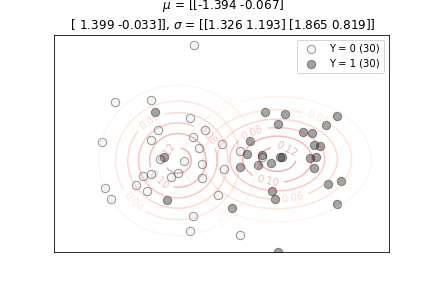
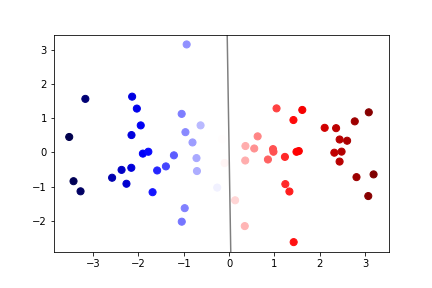
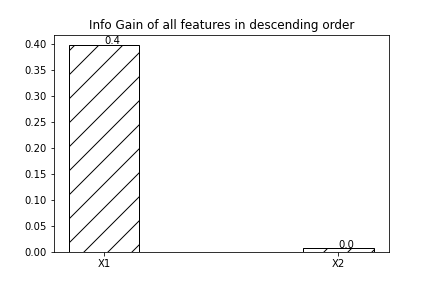
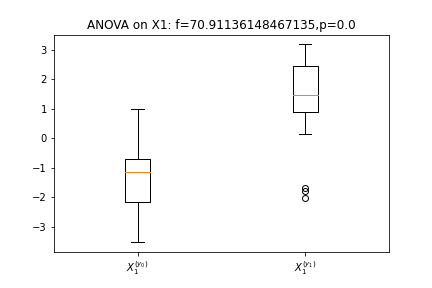
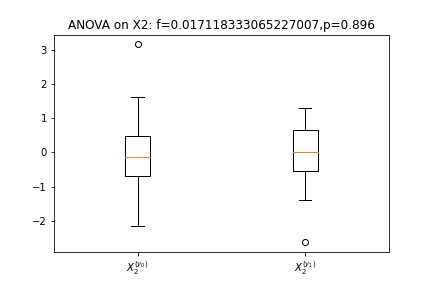
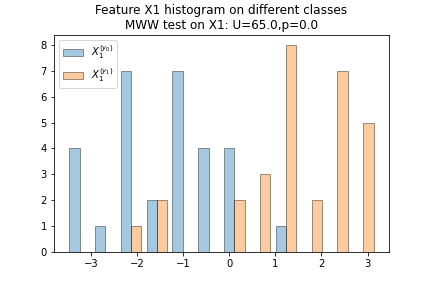
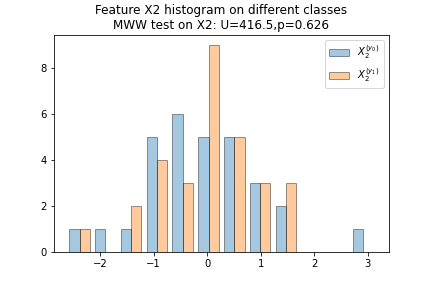
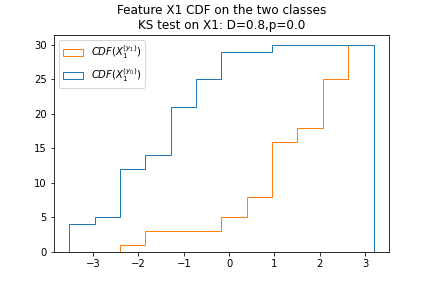
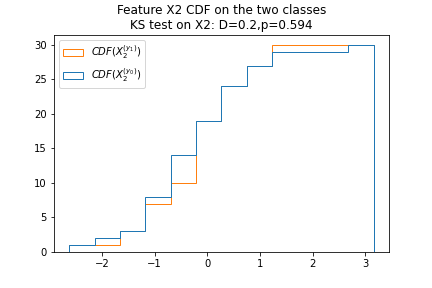
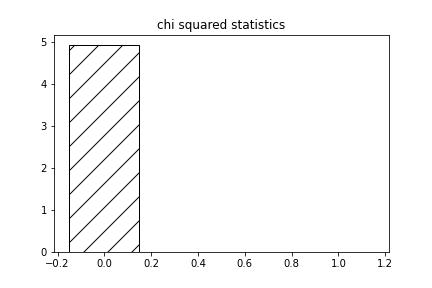
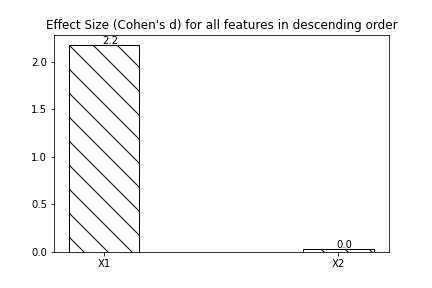

In [17]:
from IPython.display import display, HTML
display(HTML(get_html(X,y)))

## Metric Consistency Test

1. Analyze how the metrics change with datasets / their consistency   
2. Extract a common component.

Generate a series of sample datasets with different class distances, and calculate metrics on these datasets. 

  0%|                                                                                            | 0/4 [00:00<?, ?it/s]C:\Users\eleve\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `sigma_` was deprecated in 1.0 and will be removed in1.2. Use `var_` instead.
  warnings.warn(msg, category=FutureWarning)
 25%|█████████████████████                                                               | 1/4 [00:01<00:03,  1.22s/it]C:\Users\eleve\anaconda3\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\eleve\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `sigma_` was deprecated in 1.0 and will be removed in1.2. Use `var_` instead.
  warnings.warn(msg, category=FutureWarning)
 50%|██████████████████████████████████████████                                          | 2/4 [00:02<00:02,  1.38s/it]C:\Users

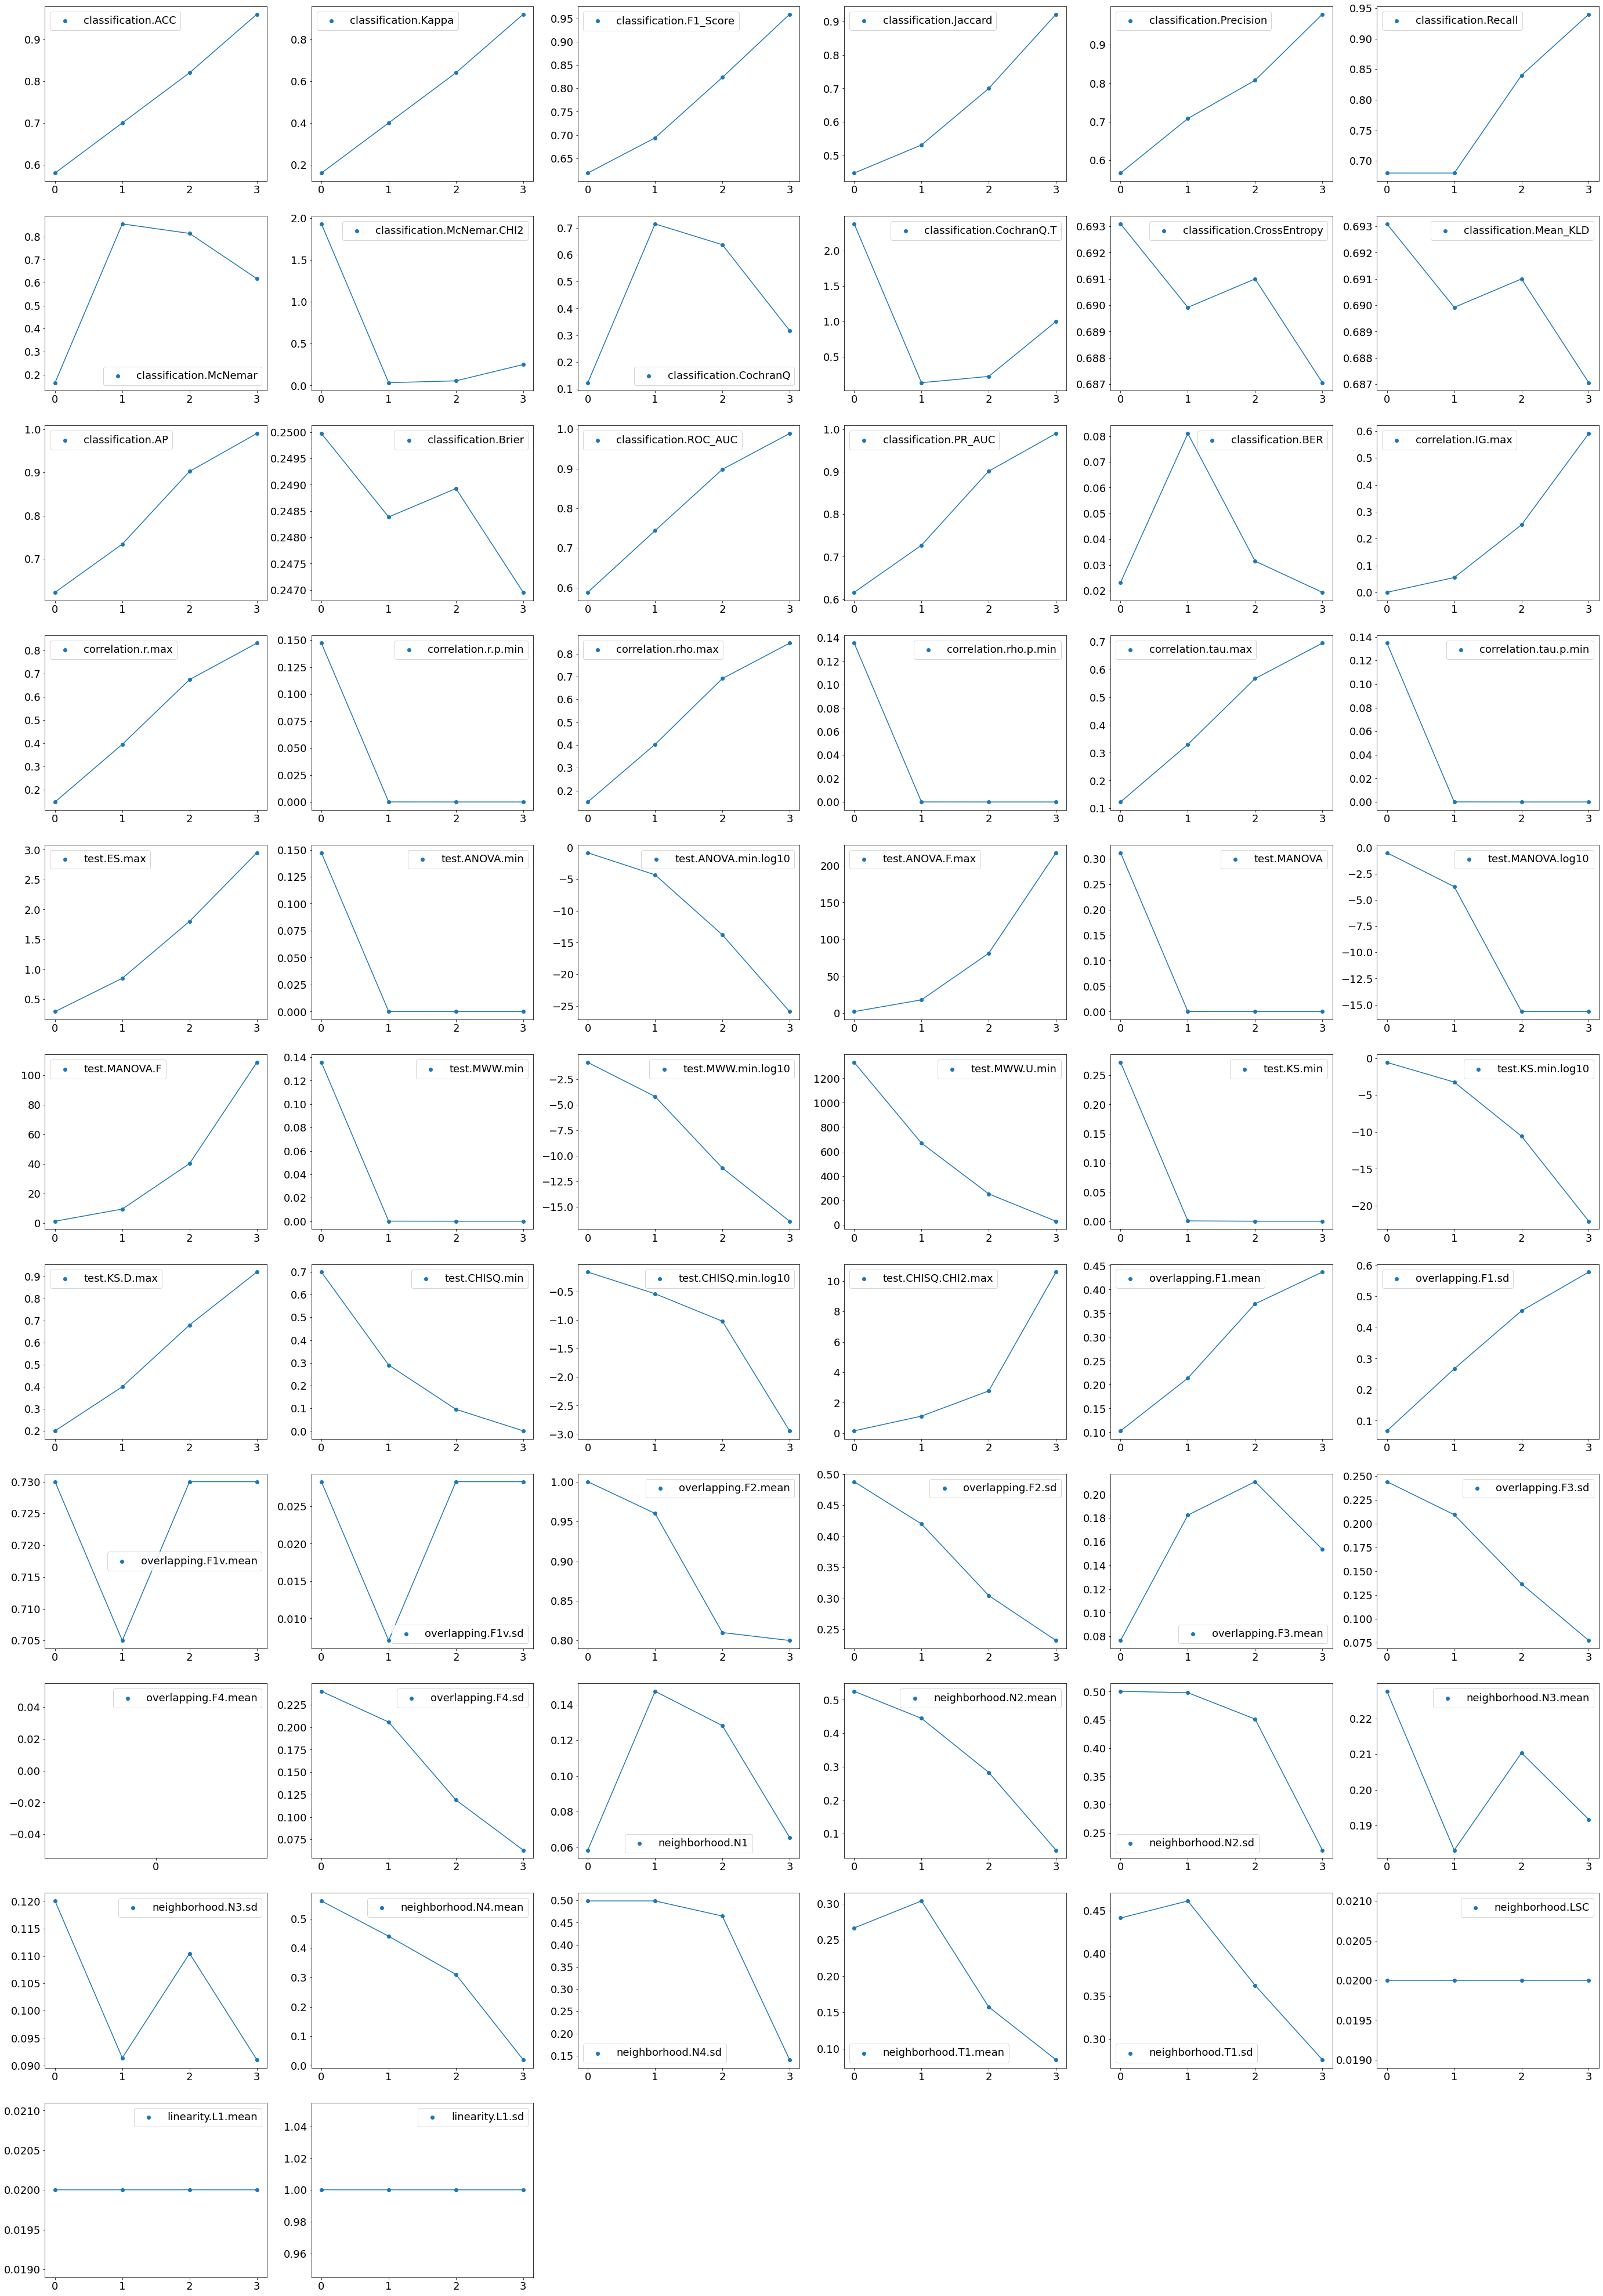

In [18]:
dcts = simulate(np.linspace(0, 3, 4), repeat = 1, nobs = 50)
visualize_dcts(dcts)

Repeat N times to get the averaged curves against different md values.

100%|████████████████████████████████████████████████████████████████████████████████| 450/450 [15:33<00:00,  2.10s/it]

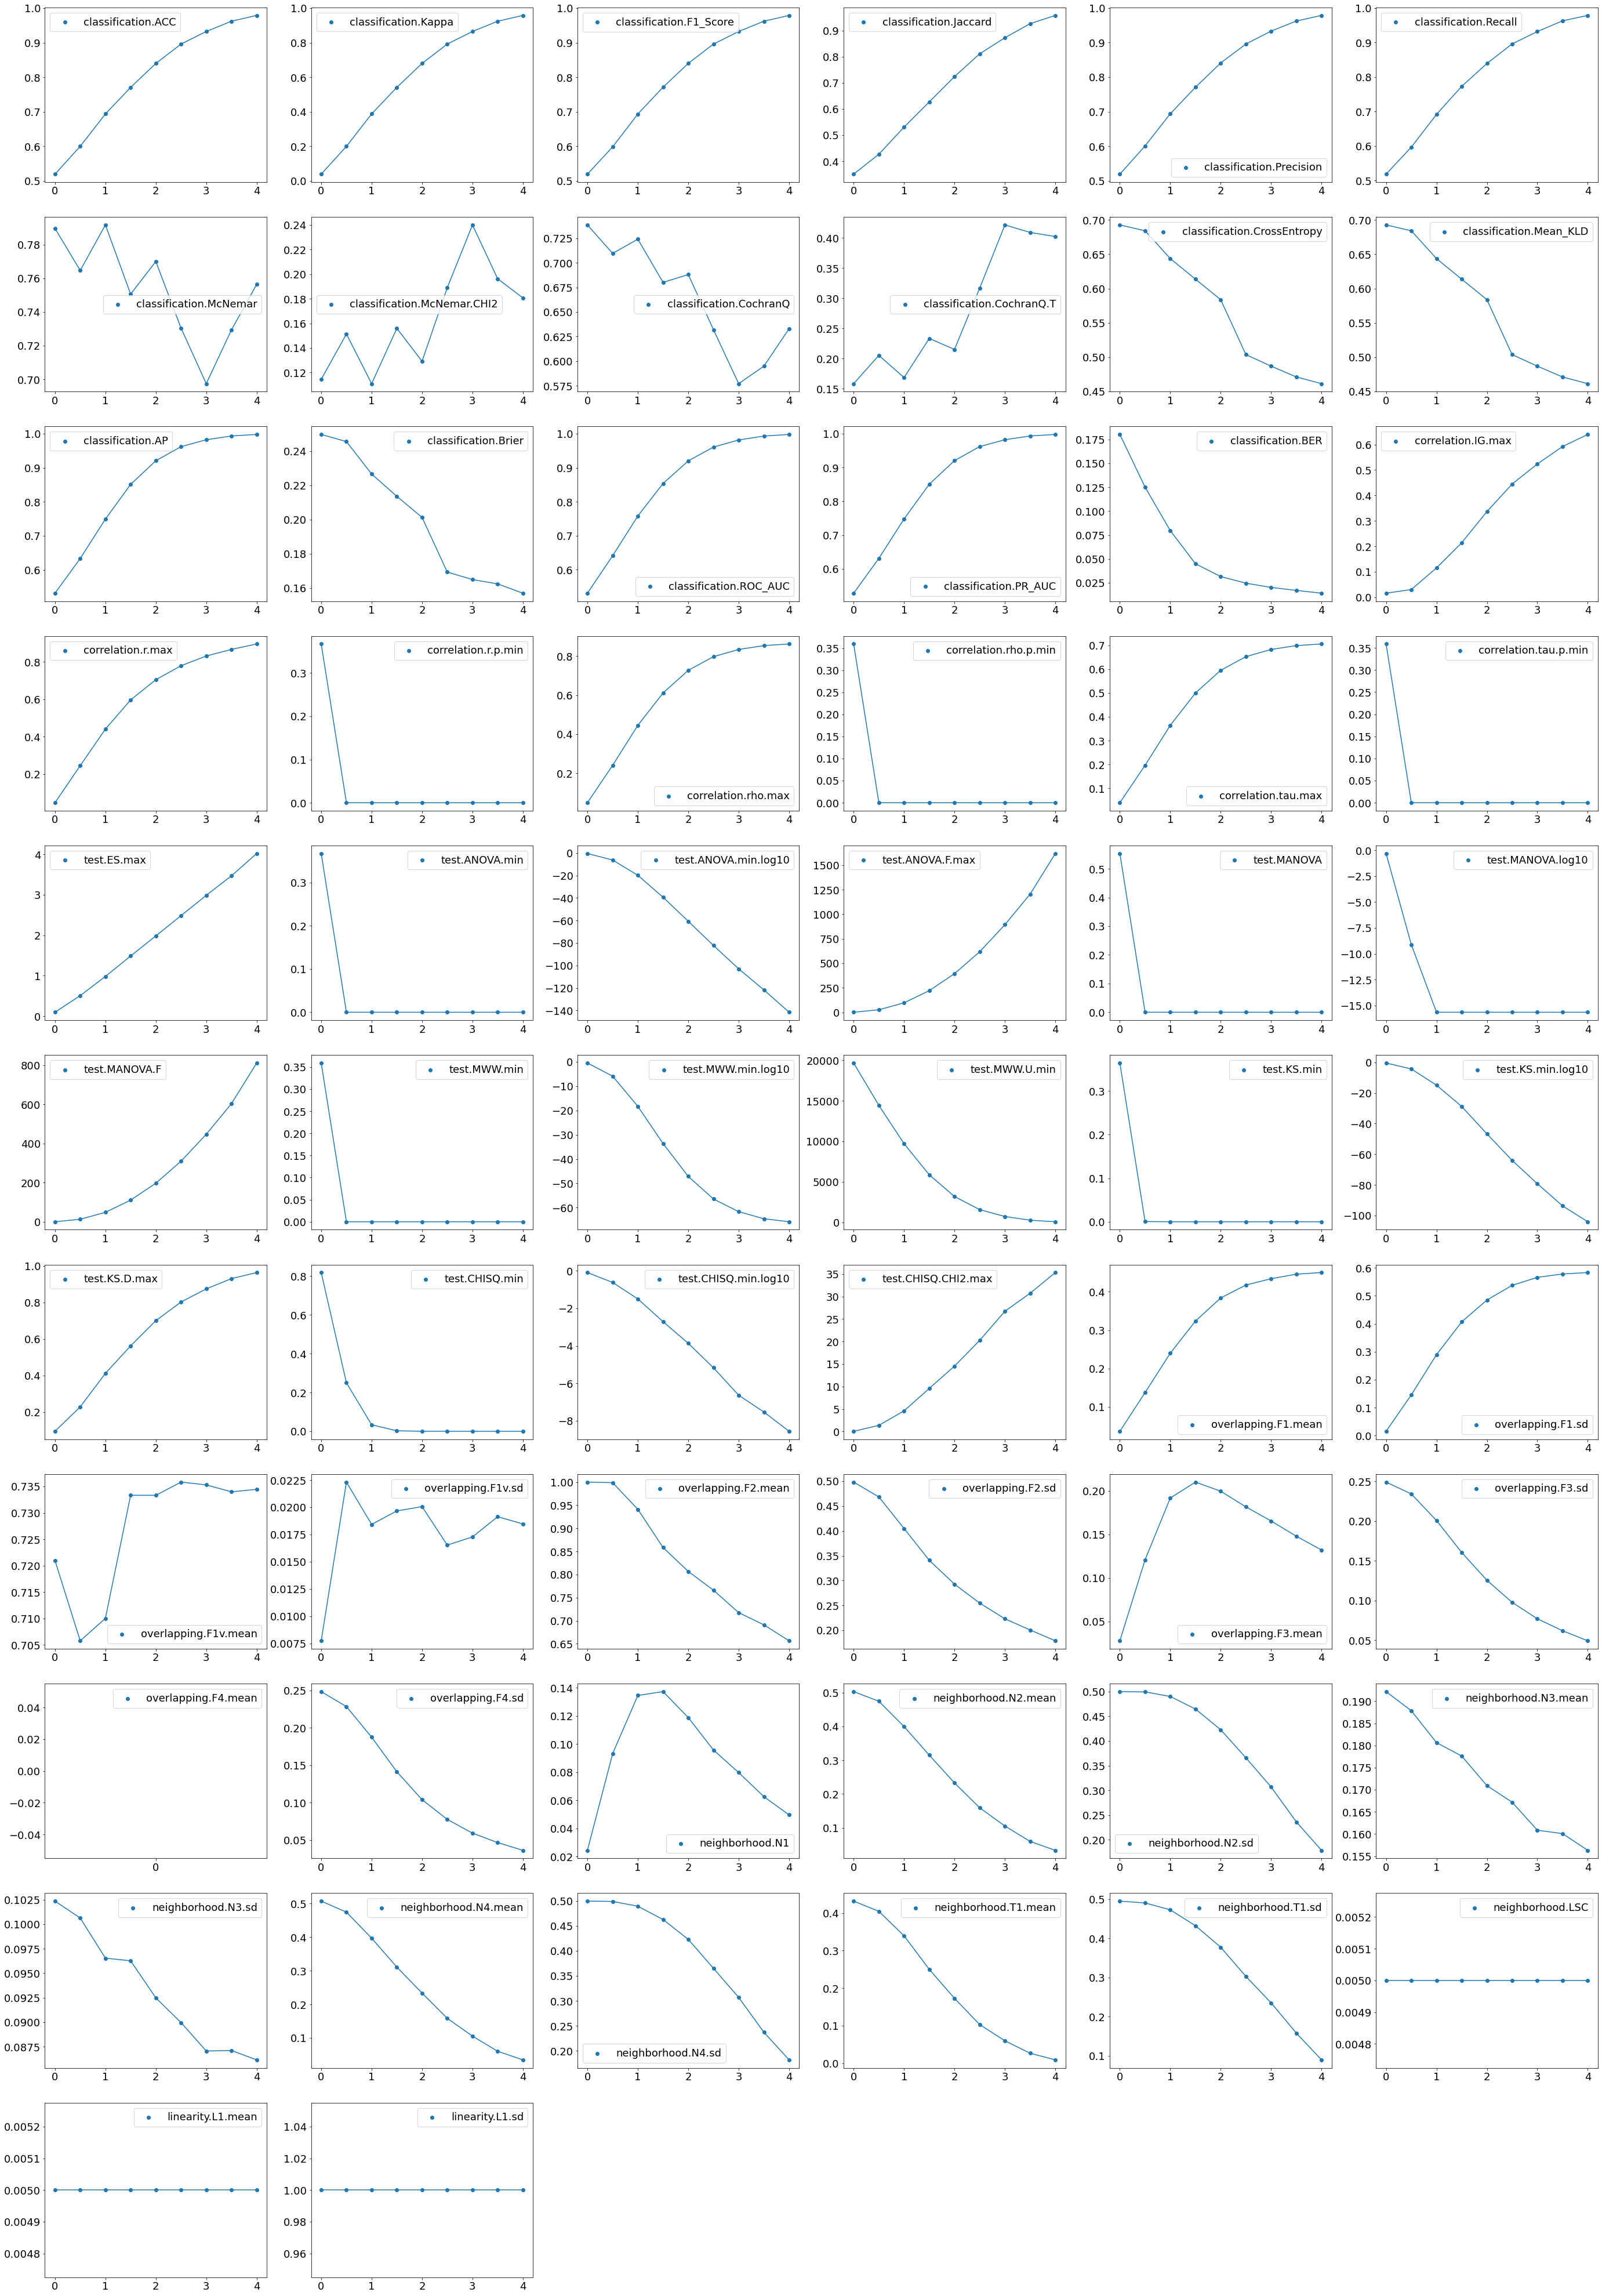

In [20]:
import warnings
warnings.filterwarnings('ignore')

dcts = simulate(np.linspace(0, 4, 9), repeat = 50, nobs = 200)
visualize_dcts(dcts)

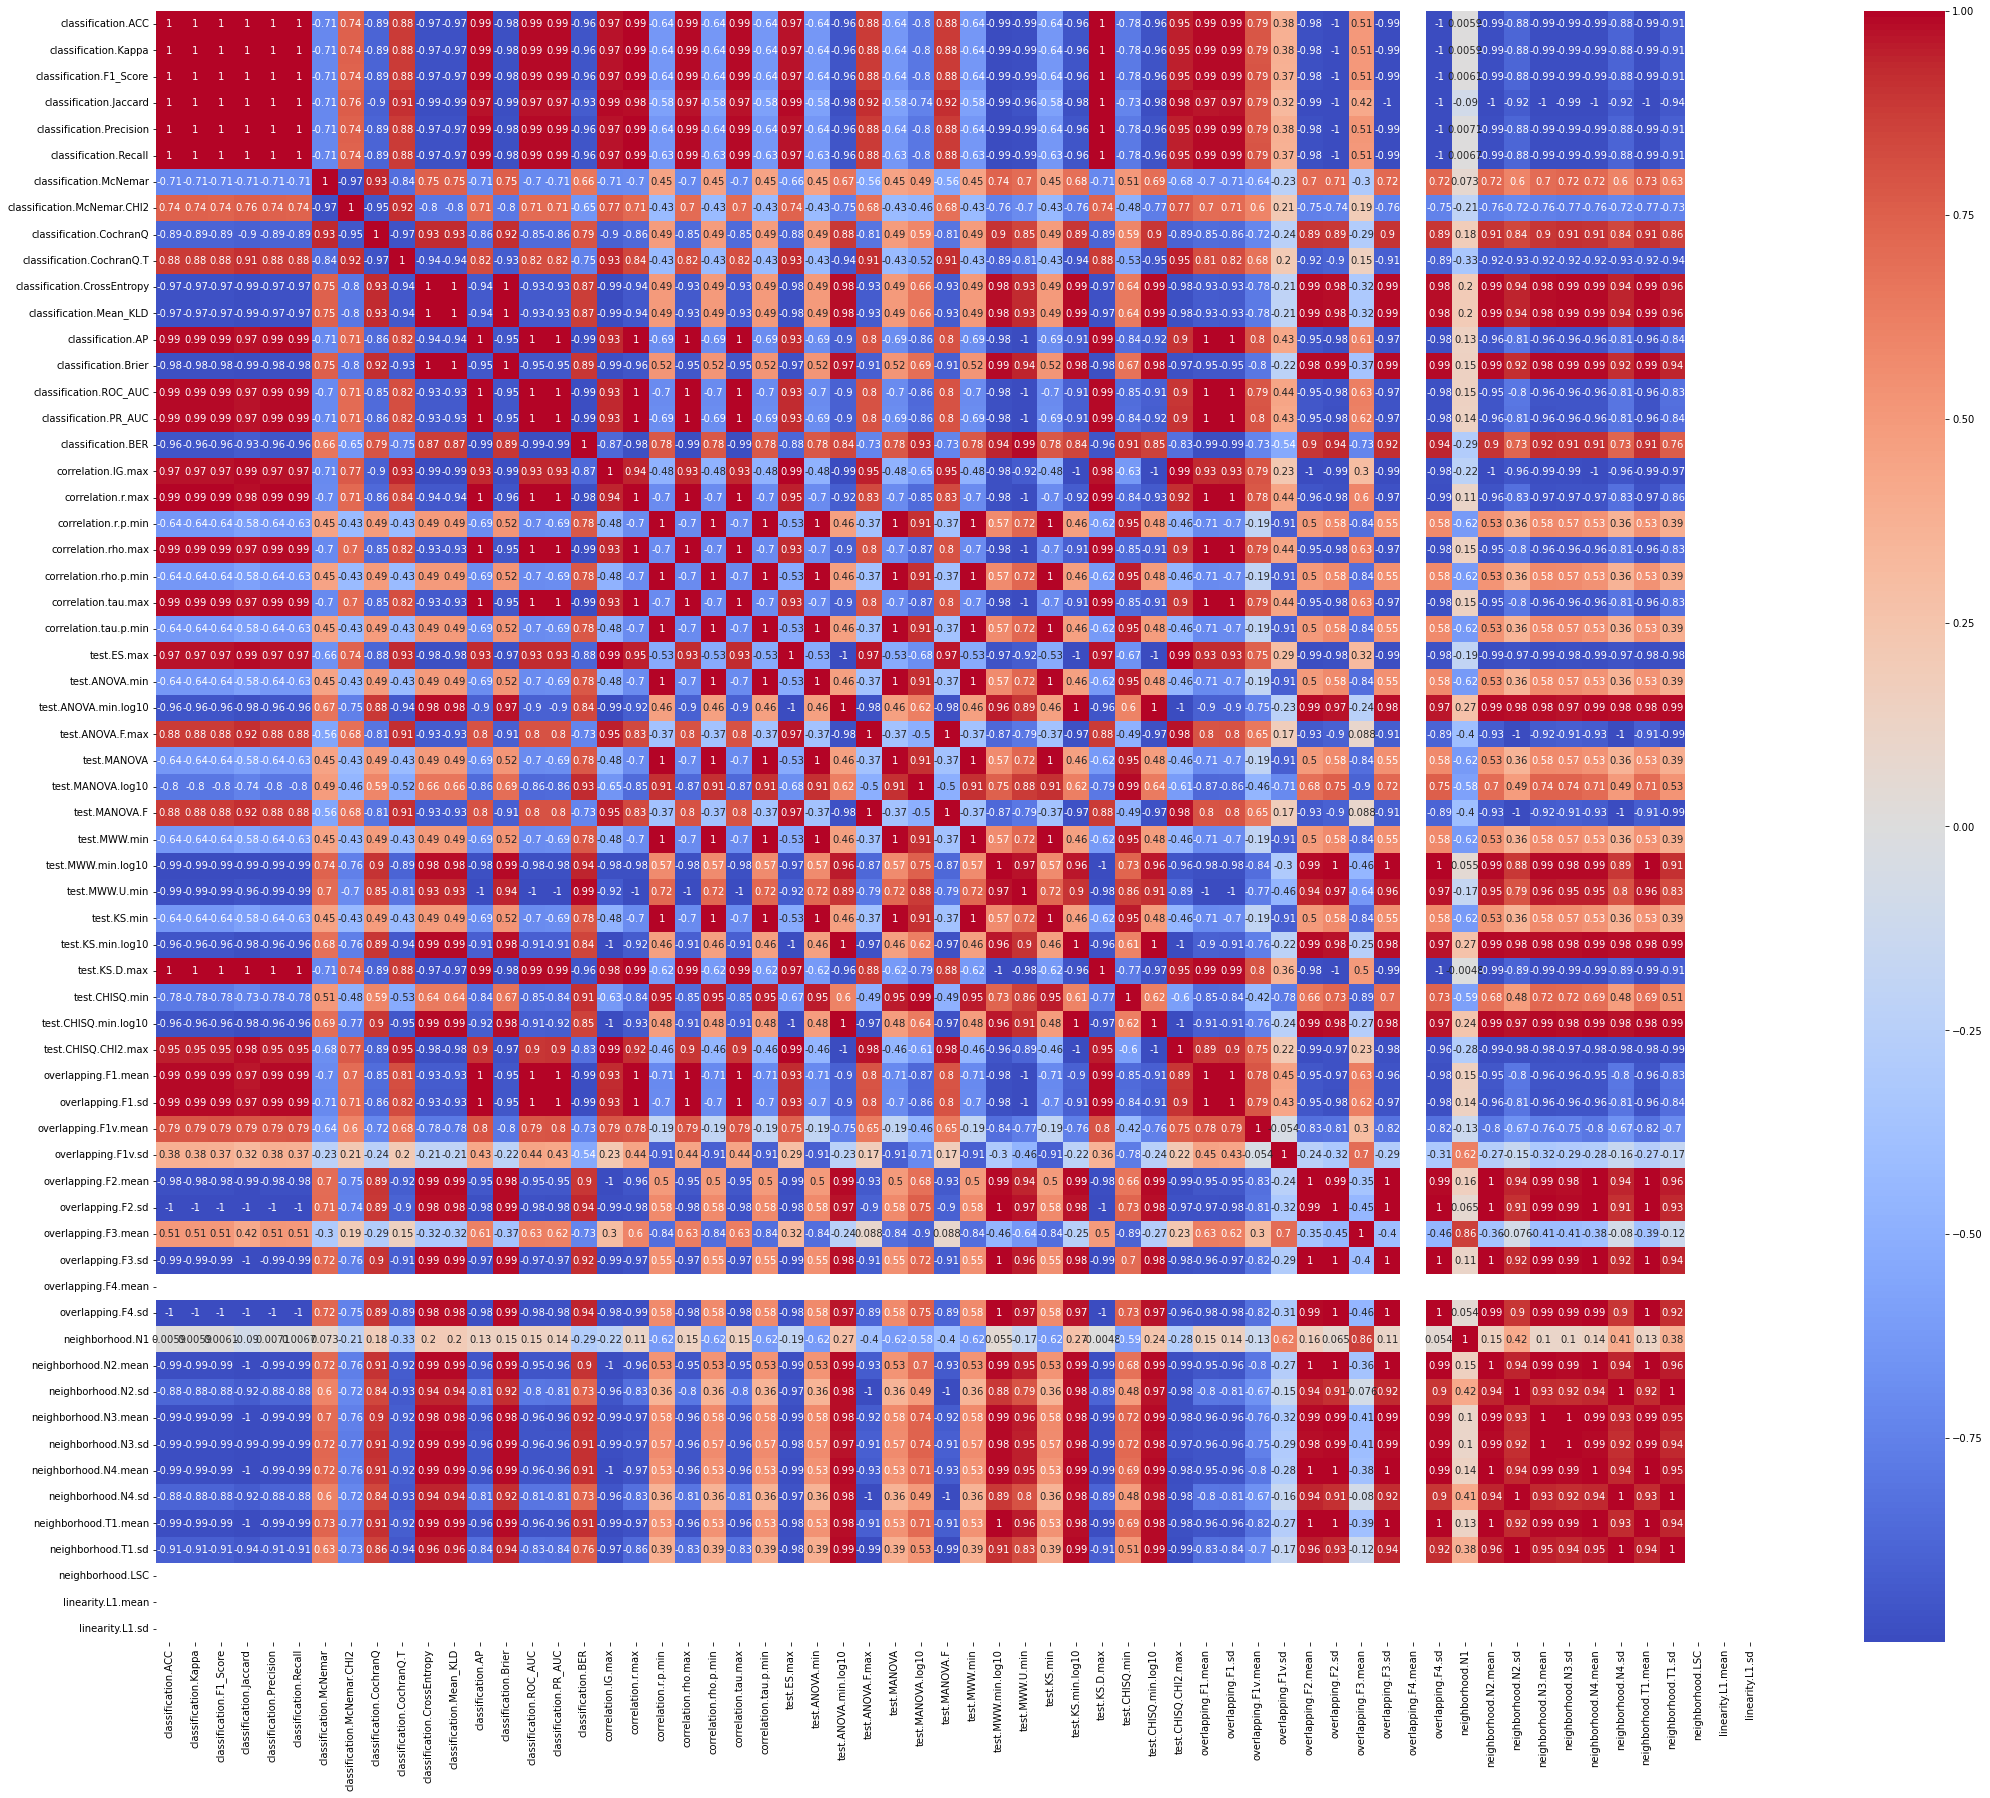

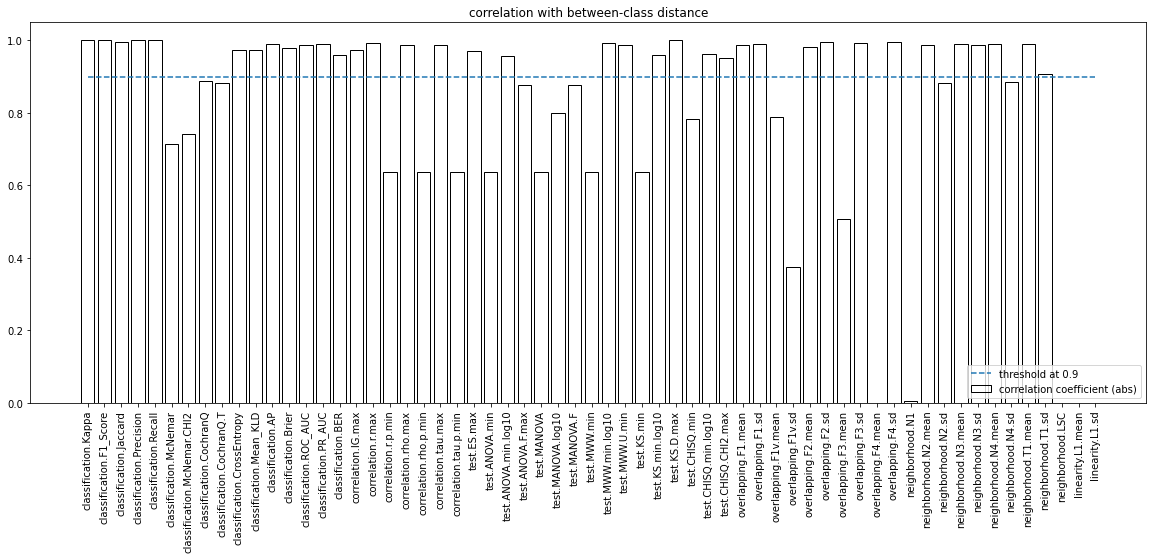

Metrics above the threshold:  ['classification.Kappa' 'classification.F1_Score' 'classification.Jaccard'
 'classification.Precision' 'classification.Recall'
 'classification.CrossEntropy' 'classification.Mean_KLD'
 'classification.AP' 'classification.Brier' 'classification.ROC_AUC'
 'classification.PR_AUC' 'classification.BER' 'correlation.IG.max'
 'correlation.r.max' 'correlation.rho.max' 'correlation.tau.max'
 'test.ES.max' 'test.ANOVA.min.log10' 'test.MWW.min.log10'
 'test.MWW.U.min' 'test.KS.min.log10' 'test.KS.D.max'
 'test.CHISQ.min.log10' 'test.CHISQ.CHI2.max' 'overlapping.F1.mean'
 'overlapping.F1.sd' 'overlapping.F2.mean' 'overlapping.F2.sd'
 'overlapping.F3.sd' 'overlapping.F4.sd' 'neighborhood.N2.mean'
 'neighborhood.N3.mean' 'neighborhood.N3.sd' 'neighborhood.N4.mean'
 'neighborhood.T1.mean' 'neighborhood.T1.sd']


In [21]:
visualize_corr_matrix(dcts, 'coolwarm')

    pca = extract_PC(dcts)
    pca.explained_variance_ratio_, pca.components_[0]

## Appendix: Libraries and versions

In [22]:
import sklearn
import scipy
import statsmodels
import numpy
import pandas
import rpy2
import seaborn
import matplotlib

print("sklearn", sklearn.__version__, "\n",
      "scipy", scipy.__version__, "\n",
      "statsmodels", statsmodels.__version__,  "\n",
      "numpy", numpy.__version__, "\n",
      "pandas", pandas.__version__, "\n",
      "matplotlib", matplotlib.__version__, "\n",
      "seaborn", seaborn.__version__, "\n",
      "rpy2", rpy2.__version__)

print("ECoL (R package) 0.4.2")

sklearn 1.0.2 
 scipy 1.7.3 
 statsmodels 0.13.2 
 numpy 1.21.5 
 pandas 1.4.2 
 matplotlib 3.5.1 
 seaborn 0.11.2 
 rpy2 3.5.5
ECoL (R package) 0.4.2


## Appendix: py script used as a call interface for upper applications

    from pyCLAMs.pyCLAMs import *
    import sys
    import json
    import uuid 
    import os

    def generate(d, n):

        X,y = mvg(nobs = n, md = d)

        # get the local file path
        fn = os.path.dirname(os.path.realpath(__file__)) + "/" + str(uuid.uuid4()) + ".csv"

        # save to csv file
        save_file(X,y, fn)

        return fn

    def analyze(csv):

        # X,y = load_file(csv)
        # s = get_html(X,y)

        # store html result into a local html file
        fn = os.path.dirname(os.path.realpath(__file__)) + "/" + str(uuid.uuid4()) + ".html"    
        with open(fn, 'w') as f:
            f.write(analyze_file(csv))

        return fn

    if __name__ == "__main__":

        mode = sys.argv[1]

        # Mode 1: generate a sample data file
        if mode == 'generate':

            d = float(sys.argv[2]) # distance between means, respect to std, i.e. (mu2 - mu1) / std, or how many stds is the difference.
            n = int(sys.argv[3]) # number of observations / samples

            fn = generate(d, n)

            print(fn)

        # Mode 2: analyze a local data file
        elif mode == 'analyze':        

            csv = sys.argv[2]

            fn = analyze(csv)

            print(fn)

        # Mode 3: generate + analyze
        elif mode == 'generate_analyze':        

            d = float(sys.argv[2]) # distance between means, respect to std, i.e. (mu2 - mu1) / std, or how many stds is the difference.
            n = int(sys.argv[3]) # number of observations / samples

            csv = generate(d, n)
            fn = analyze(csv)

            ### Without the intermediate csv file
            # X,y = mvg(nobs = n, md = d)
            # fn = os.path.dirname(os.path.realpath(__file__)) + "/" + str(uuid.uuid4()) + ".html" 
            # with open(fn, 'w') as f:
            #     f.write(get_html(X,y))

            print(fn)

## Trouble Shooting

### 1. module 'rpy2.robjects.conversion' has no attribute 'py2rpy'

> pip insall rpy2==3.4.4 # use the correct version

### 2. R_HOME must be set in the environment or Registry

    Install R
    Create R_HOME system variable
    Add R_HOME\bin to the PATH, in order to execute R from python
    Add R_HOME\bin\x64 to the PATH, in order to load R.dll
    Install package tzlocal
    May also need to reinstall rpy2

### 3. unable to initialize the JIT

    Happens only on Windows Server OS. Remains to research

In [4]:
%gui qt

from PyQt5.QtWidgets import QFileDialog

def gui_fname(dir=None):
    """Select a file via a dialog and return the file name."""
    if dir is None: dir ='./'
    fname = QFileDialog.getOpenFileName(None, "Select data file...", 
                dir, filter="All files (*);; TXt Files (*.txt);; CSV Files (*.csv)")
    return fname[0]
    
path = gui_fname()
print(path)

C:/Users/eleve/Documents/codex/py/machine learning/source/29. pyCLAMs/github/notebooks/sample.csv


## Appendix: wCLAMs - A web GUI tool based on pyCLAMs (out of date)

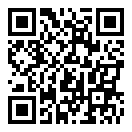

## Appendix: Code Ocean Capsule (out of date)

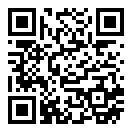

# Glossary

### metric vs measurement

metric: a system or standard to measure something.  | measurement: an observation.  
In most cases, both can be used interchangeably.  

# TODO: Metric:  decision boundary / curve tortuosity

However, this metric has flaws and limitations. Only works for 2D data (may require DR beforehand) 

### Version 1
The simplest mathematical method to estimate tortuosity is the arc-chord ratio, i.e. the ratio of the length of the curve to the distance between its ends.

   $ \tau ={\frac {C}{D}} $

Arc-chord ratio equals 1 for a straight line, but infinite for circle. This is unreasonable, as circular decision boundary can also be smooth.   

### Version 2

$ \tau = E (|\kappa (t)|) = {{\int_{t_1}^{t_2} |\kappa (t)| \, dt} \over {t_2-t_1}} $  

Mathematical expectation of the absolute value of curvature.   
$\tau$ of a straight line is 0.  $\tau$ of a circle is 1/R.  


### Version 3

$ \tau = E (|\kappa '(t)|) = {{\int_{t_1}^{t_2} |\kappa '(t)| \, dt} \over {t_2-t_1}} $

Mathematical expectation of the absolute value of curvature's derivative.  

$\tau$ of a straight line is 0.  $\tau$ of a circle is also 0, as the curvature derivative is constantly 0.   


Version 2 and 3 both use curvature. It is defined as:   
Curvature: $\kappa = {1 \over R} =  {dT \over ds}   =  {{dT/dt} \over {ds/dt}}  $,   
i.e. change of unit tangent vector with respect to change of arc length.   
R is the radius of the curvature / incircle.  

$\kappa = {{x'y''-x''y'}\over{(x'^2+y'^2)^{3/2}}}$  with respect to t, i.e.  x=x(t), y=y(t)   
or $\kappa = {{|y''|}\over{(1+y'^2)^{3/2}}}$  if y = f(x) is given


#### Implementation Details

numpy has a `gradient` method that does these difference calculations for us, taking care of the details of averaging previous and next slopes for each interior point and leaving each endpoint alone, etc.  

If the decision boundary is composed of multiple disconnected enclosed curves. We sum up the tortuosities of all the disconnected vertices as a penalty.




For curvature calculation, we provide three implementations.

1. use $\kappa = {{x'y''-x''y'}\over{(x'^2+y'^2)^{3/2}}}$ and `numpy.graident`
2. use $r = {{abc} \over {4S}}$, $\kappa = {{4S} \over {abc}}$.   
$S$ is the area of triangle and can be solved by `Heron's formula` $S = \sqrt {(a+(b+c))(c-(a-b))(c+(a-b))(a+(b-c))} / 4 $
3. optimize $\sum {({\sqrt{ (x - xc)^2 + (y - yc)^2 } - Rc})}^2 $ by `scipy.optimize.leastsq`  

<hr/>

`matplotlib.contour()` returns a QuadContourSet object, which contains vertices in the collections attribute.
We can specify `levels=[0]` to get the decision boundary.
Specifigy `levels=[-1,1]` to get the margins.


In [6]:
import math
import numpy as np

def curvature_v1(vertices, res = 1):

    vertices = np.array(vertices)
    
    # res: sample distance. default 1
    dx_dt = np.gradient(vertices[:, 0], res)
    dy_dt = np.gradient(vertices[:, 1], res)

    ds_dt = np.sqrt(dx_dt * dx_dt + dy_dt * dy_dt)

    velocity = np.array([ [dx_dt[i], dy_dt[i]] for i in range(dx_dt.size)])
    # plt.plot(velocity[:,0],velocity[:,1], alpha = 0.5)
    
    tangent = np.array([1/ds_dt] * 2).transpose() * velocity    
    # 1. At each value of t, tangent is pointing in the same direction as velocity,   
    # 2. At each value of t, tangent is a unit vector. `np.sqrt(tangent[:,0] * tangent[:,0] + tangent[:,1] * tangent[:,1]) # all elements is 1
    
    tangent_x = tangent[:, 0]
    tangent_y = tangent[:, 1]

    deriv_tangent_x = np.gradient(tangent_x, res)
    deriv_tangent_y = np.gradient(tangent_y, res)

    dT_dt = np.array([ [deriv_tangent_x[i], deriv_tangent_y[i]] for i in range(deriv_tangent_x.size)])

    length_dT_dt = np.sqrt(deriv_tangent_x * deriv_tangent_x + deriv_tangent_y * deriv_tangent_y)

    normal = np.array([1/length_dT_dt] * 2).transpose() * dT_dt

    d2s_dt2 = np.gradient(ds_dt, res)
    d2x_dt2 = np.gradient(dx_dt, res)
    d2y_dt2 = np.gradient(dy_dt, res)

    curvature = np.abs(d2x_dt2 * dy_dt - dx_dt * d2y_dt2) / (dx_dt * dx_dt + dy_dt * dy_dt)**1.5
    
    return curvature[res+1:-res-1].tolist() # trim the few start and end points

In [7]:
import math
import numpy as np

def curvature_v2(vertices, res = 1):

    vertices = np.array(vertices)    
    
    curvatures = []
    
    for i in range(1, len(vertices) - 1, res):
        # the three vertices of triangle
        points_utm = vertices[i-1:i+2]
        
        # points_utm is a 3-by-2 array, containing the easting and northing coordinates of 3 points
        # Compute distance to each point
        a = np.hypot(points_utm[0, 0] - points_utm[1, 0], points_utm[0, 1] - points_utm[1, 1])
        b = np.hypot(points_utm[1, 0] - points_utm[2, 0], points_utm[1, 1] - points_utm[2, 1])
        c = np.hypot(points_utm[2, 0] - points_utm[0, 0], points_utm[2, 1] - points_utm[0, 1])

        if (a+b<=c or a+c<=b or b+c<=a):
            k = 0
        else:
            # Compute inverse radius of circle using surface of triangle (for which Heron's formula is used)
            k = np.sqrt((a+(b+c))*(c-(a-b))*(c+(a-b))*(a+(b-c))) / 4    # Heron's formula for triangle's surface
        
        den = a*b*c  # Denumerator; make sure there is no division by zero.
        if den == 0.0:  # Very unlikely, but just to be sure
            curvature = 0.0
        else:
            curvature = 4*k / den
    
        curvatures.append(curvature)
        
    return curvatures

In [8]:
import math
import numpy as np
from scipy import optimize

class ComputeCurvature:
    def __init__(self):
        """ Initialize some variables """
        self.xc = 0  # X-coordinate of circle center
        self.yc = 0  # Y-coordinate of circle center
        self.r = 0   # Radius of the circle
        self.xx = np.array([])  # Data points
        self.yy = np.array([])  # Data points

    def calc_r(self, xc, yc):
        """ calculate the distance of each 2D points from the center (xc, yc) """
        return np.sqrt((self.xx-xc)**2 + (self.yy-yc)**2)

    def f(self, c):
        """ calculate the algebraic distance between the data points and the mean circle centered at c=(xc, yc) """
        ri = self.calc_r(*c)
        return ri - ri.mean()

    def df(self, c):
        """ Jacobian of f_2b
        The axis corresponding to derivatives must be coherent with the col_deriv option of leastsq"""
        xc, yc = c
        df_dc = np.empty((len(c), self.xx.size))

        ri = self.calc_r(xc, yc)
        df_dc[0] = (xc - self.xx)/ri                   # dR/dxc
        df_dc[1] = (yc - self.yy)/ri                   # dR/dyc
        df_dc = df_dc - df_dc.mean(axis=1)[:, np.newaxis]
        return df_dc

    def fit(self, xx, yy):
        self.xx = xx
        self.yy = yy
        center_estimate = np.r_[np.mean(xx), np.mean(yy)]
        center = optimize.leastsq(self.f, center_estimate, Dfun=self.df, col_deriv=True)[0]

        self.xc, self.yc = center
        ri = self.calc_r(*center)
        self.r = ri.mean()

        return 1 / self.r  # Return the curvature

def curvature_v3(vertices, window_size = 4):

    vertices = np.array(vertices)    
    
    curvatures = []
    
    for i in range(0, len(vertices) - window_size, window_size):
        
        x = np.array(vertices[i:i+window_size, 0].tolist())
        y = np.array(vertices[i:i+window_size, 1].tolist())
        curvature = ComputeCurvature().fit(x, y)

        curvatures.append(curvature)        
        
    return curvatures

C:\Users\eleve\AppData\Local\Temp\ipykernel_12776\1685440968.py:31: RuntimeWarning: divide by zero encountered in true_divide
  normal = np.array([1/length_dT_dt] * 2).transpose() * dT_dt
C:\Users\eleve\AppData\Local\Temp\ipykernel_12776\1685440968.py:31: RuntimeWarning: invalid value encountered in multiply
  normal = np.array([1/length_dT_dt] * 2).transpose() * dT_dt


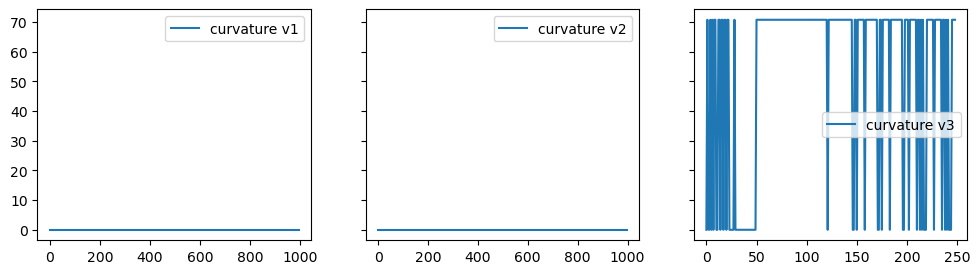

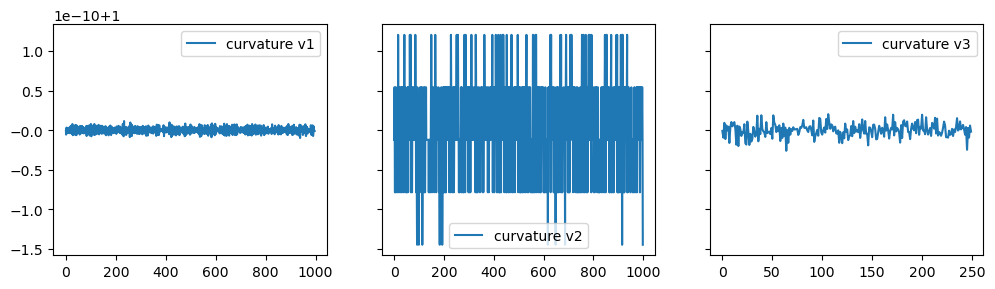

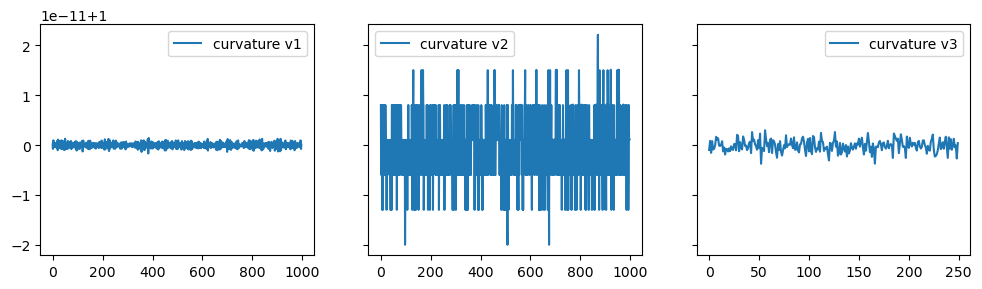

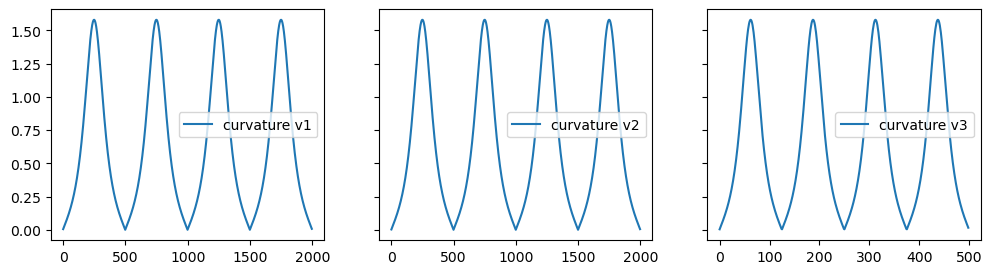

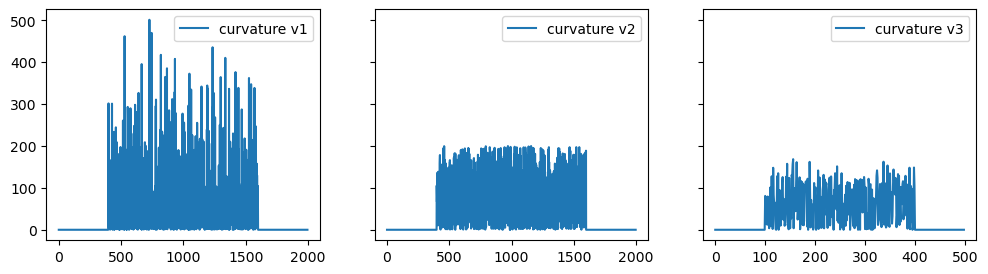

In [11]:
import math
import numpy as np
pi = math.pi
import random
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

def LineWithNoise(s=0, l=10, n = 1000): 
    noise = savgol_filter(np.random.randn(n), int(n/5)*2+1, 3)*s
    return [(l*x/n ,l*x/n + noise[x] ) for x in range(0,n)] # + random.uniform(-0.1,0.1) * s

def PointsInCircum(r=1,n = 1000):
    return [(math.cos(2*pi/n*x)*r,math.sin(2*pi/n*x)*r) for x in range(0,n+1)]

def Arc(r=1,n = 1000):
    return [(math.cos(0.75*pi/n*x)*r,math.sin(0.75*pi/n*x)*r) for x in range(0,n+1)]

def Sine(p = 3, l = 10, n = 1000):
    return [(l*x/n, math.sin(2*pi*x*p/n)) for x in range(0,n)]


dict_shape = {}
dict_shape['line'] = LineWithNoise()
dict_shape['arc'] = Arc()
dict_shape['circle'] = PointsInCircum(r=1)
dict_shape['sine'] = Sine(p = 2, n =2000)
dict_shape['rough line'] = LineWithNoise(s = 4, n = 2000) # use similar number of vertices as the case study data set.

for shape in dict_shape:
    vs = np.array(dict_shape[shape])
    
    cv1 = curvature_v1(vs)
    cv2 = curvature_v2(vs)
    cv3 = curvature_v3(vs)
    
    # Creates four polar axes, and accesses them through the returned array
    fig, axes = plt.subplots(1, 3, sharex=False, sharey=True, figsize=(12,3))
    
    axes[0].plot(cv1, label='curvature v1')
    axes[1].plot(cv2, label='curvature v2')
    axes[2].plot(cv3, label='curvature v3')
    axes[0].legend()
    axes[1].legend()
    axes[2].legend()
    
    plt.show()

C:\Users\eleve\AppData\Local\Temp\ipykernel_12776\682272716.py:30: RuntimeWarning: invalid value encountered in true_divide
  df_dc[0] = (xc - self.xx)/ri                   # dR/dxc
C:\Users\eleve\AppData\Local\Temp\ipykernel_12776\682272716.py:31: RuntimeWarning: invalid value encountered in true_divide
  df_dc[1] = (yc - self.yy)/ri                   # dR/dyc
C:\Users\eleve\anaconda3\lib\site-packages\scipy\optimize\minpack.py:476: RuntimeWarning: Number of calls to function has reached maxfev = 300.
  warnings.warn(errors[info][0], RuntimeWarning)


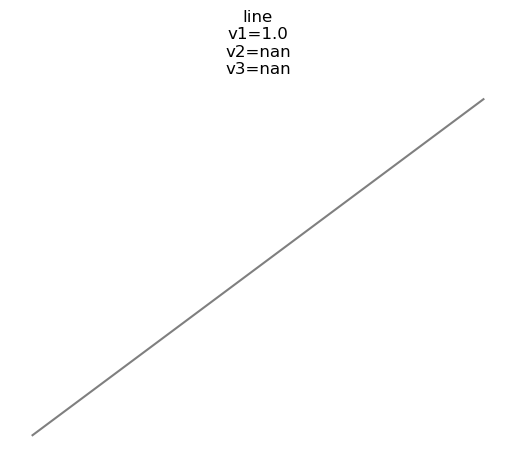

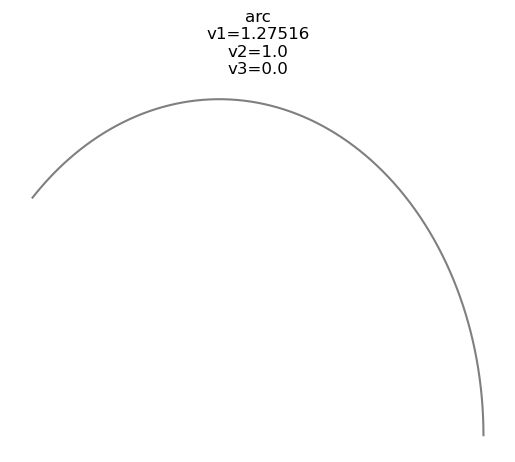

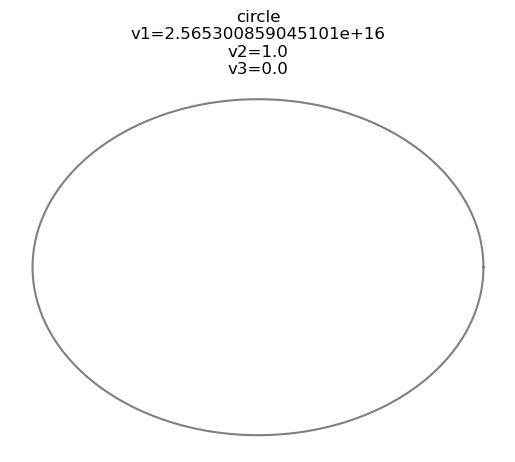

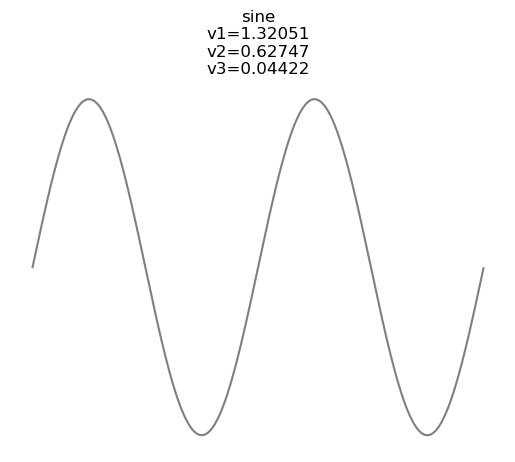

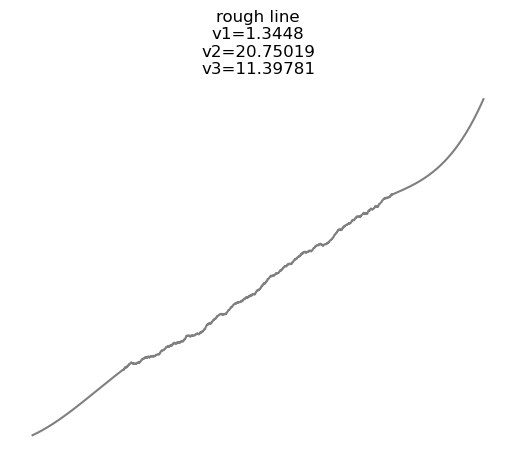

In [12]:
import math
import numpy as np

def curve_tortuosity(vertices, impl = 3, window_size = 7):

    curvatures = []
    
    if impl == 1:
        curvatures = curvature_v1(vertices)
    elif impl == 2:
        curvatures = curvature_v2(vertices)
    else: # default use v3
        curvatures = curvature_v3(vertices, window_size = window_size)    
    
    # leave out the 1st and last points
    dK_dt = np.gradient(curvatures)[1:-1]
    
    #### Version 1 - arc over chord ####\n",
    C = 0
    for i in range(len(vertices)-1):
        p1 = vertices[i]
        p2 = vertices[i+1]
        d = math.sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)
        C += d
    
    p1 = vertices[0]
    p2 = vertices[len(vertices)-1]
    D = math.sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)
    
    if (D > 0):
        V1 = C/D
    else:
        V1 = math.inf
        
    V2 = np.mean( np.abs(curvatures) )
    V3 = np.mean( np.abs(dK_dt))
    V4 = abs(np.mean(dK_dt))
    V5 = np.mean( np.abs(dK_dt/curvatures[1:-1]) )
    
    return V1,V2,V3,V4



dict_shape = {}
dict_shape['line'] = LineWithNoise()
dict_shape['arc'] = Arc()
dict_shape['circle'] = PointsInCircum(r=1)
dict_shape['sine'] = Sine(p = 2, n =2000)
dict_shape['rough line'] = LineWithNoise(s = 4, n = 2000) # use similar number of vertices as the case study data set.

for shape in dict_shape:
    vs = np.array(dict_shape[shape])
    t = curve_tortuosity(vs)
    plt.figure()
    plt.plot(vs[:,0],vs[:,1], alpha = 0.5, color='black')
    plt.axis('off')
    # Turn off tick labels
    ax = plt.gca()
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    title = (shape
              + '\nv1=' + str(round(t[0],5))
              + '\nv2=' + str(round(t[1],5))
              + '\nv3=' + str(round(t[2],5)))
    plt.title(title)

There are numerical errors for curvature_v1. A greater n (resolution), a smaller error.

Special case of disconnected decison boundary

In [14]:
from scipy.signal import savgol_filter
from clams import mvg

def decision_boundary_tortuosity(vertice_set, window_size = 7, filter_window_size = 7):

    plt.figure()
    concated = np.array((0,2))
    ts = []
    for vertices in vertice_set:   
        
        yhat = vertices[:,1]
        if filter_window_size > 0:
            window_size = min(filter_window_size, len(vertices))
            yhat = savgol_filter(vertices[:,1], window_size, 3)
            
        plt.plot(vertices[:,0], yhat, label = str(len(vertices)), linestyle = 'dashed')
        vertices[:,1] = yhat
        ts.append(curve_tortuosity(vertices, impl = 2, window_size = window_size))
        concated = np.vstack((concated, vertices))
    plt.legend()
    plt.show()

    print(np.array(ts))
    tortuosity = np.sum(ts, axis = 0) #curve_tortuosity(concated, impl=2, window_size = window_size)
    print("Vertice sets: ", len(vertice_set))
    print("Total vertices: ", len(concated))
    print("Tortuosity = ", tortuosity)
    
    return tortuosity

X_sim, y_sim = mvg(md = 0, nobs = 50)
acc, vertice_set = classify_with_svm(X_sim, y_sim, verbose = False)
decision_boundary_tortuosity(vertice_set, window_size = 5)

Unable to determine R home: [WinError 2] The system cannot find the file specified


rpy2 3.X may not support Windows. ECoL metrics may not be available.


NameError: name 'classify_with_svm' is not defined